In [2]:
#============== NUMBA AND NUMPY ==============
import sys
import os
import numpy as np
from numpy import linalg as LA
import scipy.constants
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
import matplotlib.gridspec as gridspec

import SolverCQWs as solver
from IPython.display import display, Math
from tabulate import tabulate

q = 1.602176e-19 #C
kb = 1.3806504e-23 #J/K
nii = 0.0
hbar = 1.054588757e-34
m_e= 9.1093826E-31 #kg
pi=np.pi
eps0= 8.8541878176e-12 #F/m
J2meV=1e3/q
from thomas_solve  import TDMA
plt.rcParams['text.usetex']         = True
plt.rcParams['legend.frameon']      = False

import platform
if platform.system() == 'Linux':
    newpath = os.getcwd() + '/DATA'
    
elif  platform.system() == 'Windows':
    newpath = os.getcwd() + '\\DATA'
    
if not os.path.exists(newpath):
    os.makedirs(newpath)







CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs
Total layer number: 5
Direct Transitions


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

|  ELECTRON [eV]  |  HEAVY HOLE [eV]  |  LIGHT HOLE [eV]  |
|-----------------+-------------------+-------------------|
|   E1-> 1.5366   |   HH1->-0.0040    |   LH1->-0.0124    |
|   E2-> 1.5536   |   HH2->-0.0082    |   LH2->-0.0237    |


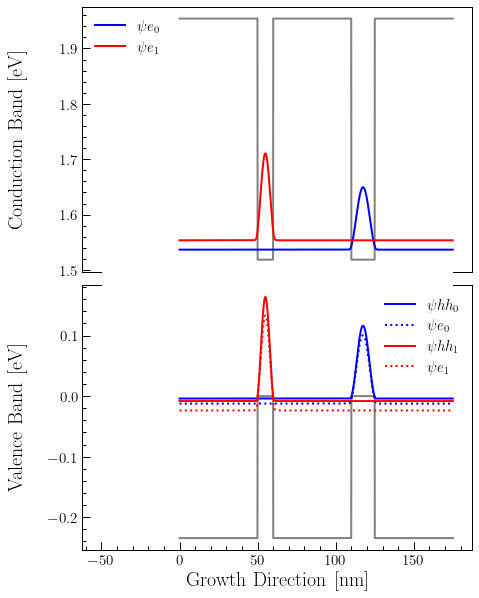

In [28]:
%time



class Structure(object): pass
s1= Structure() # this will be our datastructure

# TEMPERATURE
s1.T =12#Kelvin

# Binding Energy
s1.HHBinding =7.5e-3 #meV
s1.LHBinding =7.8e-3 #meV

#s3.ThHHBinding = 6.07e-3
# s3.ThLHBinding = 6.76e-3
# s3.naHHBinding = 7.25e-3
# s3.naLHBinding = 7.71e-3



# Band Offset ratios
s1.Qc = 0.65
s1.Qv = 0.35

#s0.scheme = 0



# Total subband number to be calculated for electrons
s1.subbands = 2
# APPLIED ELECTRIC FIELD
s1.Fapp = 0e5 # (V/m)

# For 1D, z-axis is choosen
s1.gridfactor = .1#nm

# REGIONS
# Region input is a two-dimensional list input.
#         | Thickness (nm) | Material | Alloy fraction | Doping(cm^-3) | n or p type |


s1.material =[
             [ 50.0, 'AlGaAs',   0.5,  0, '-','Barrier'],
             [ 10.0,'GaAs'  ,      0,   0, '-','Well'],
             [ 50.0,'AlGaAs'  ,    0.5,   0, '-','Well'],
             [ 15.0,'GaAs'  ,      0,   0, '-','Well'],
             [ 50.0,'AlGaAs'  ,     0.5,   0, '-','Well'],
             ]

# s2.material =[
#              [ 10 ,'GaAs'  ,      0,   0, 'n','Well'],
#              [ 300, 'AlGaAs',   0.15,   0, 'n','Barrier']
#               ]






structure1 = s1




nm = 1e-9

# RUN SIMULATION
model1 = solver.StructureFrom(structure1) #
sol1 = solver.Solver(model1).QuantumSolutions(absolute =True,Print=True)
solver.Solver(model1).plotting(sol1,amp=10,axmin=150,axmax=100,eymin =-0.01,eymax=0.01,hymin=-0.05,hymax=0.12)
#TrArr1 = np.vstack((sol1.TEHH,sol1.TELH))
#np.savetxt(newpath+'/SQWS-IICO.dat',TrArr1,delimiter=',')
#solver.Solver(model1).print_result("SQWs-IICO M752",sol1)

In [3]:
displayt = []
for i in range(model1.subbands):
    if i%2 == 0:
        displayt.append(["E%d->HH%d :" %(i,i), " %.4f"%(sol1.TEHH[i])])
        displayt.append(["E%d->LH%d :" %(i,i), " %.4f"%(sol1.TELH[i])])
    else:
         displayt.append(["E%d->HH%d :" %(i,i), " %.4f"%(sol1.TEHH[i])])
         displayt.append(["E%d->LH%d :" %(i,i), " %.4f"%(sol1.TELH[i])])

print(tabulate(displayt,headers=["Transition","Value (eV)"],tablefmt="presto"))

 Transition   |   Value (eV)
--------------+--------------
 E0->HH0 :    |       1.5382
 E0->LH0 :    |       1.5467
 E1->HH1 :    |       1.617
 E1->LH1 :    |       1.6499


In [76]:
solver.Solver(model1).print_result("SQWs-IICO",sol1)

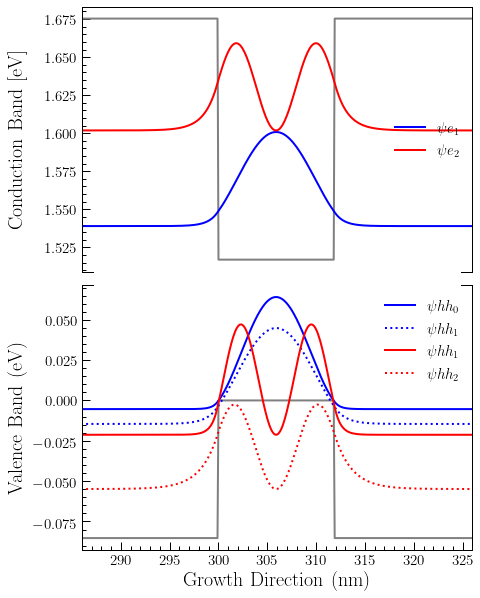

In [10]:
plt.rcParams['xtick.labelsize']     = 15
plt.rcParams['ytick.labelsize']     = 15
plt.rcParams['axes.linewidth']      = 1
plt.rcParams["xtick.minor.visible"] =  True
plt.rcParams["xtick.major.size"]    =  8
plt.rcParams["xtick.minor.size"]    =  4
plt.rcParams["xtick.major.width"]   =  1
plt.rcParams["xtick.minor.width"]   =  1
plt.rcParams["xtick.direction"]     =  'in'
plt.rcParams["ytick.minor.visible"] =  True
plt.rcParams["ytick.major.size"]    =  8
plt.rcParams["ytick.minor.size"]    =  4
plt.rcParams["ytick.major.width"]   =  1
plt.rcParams["ytick.minor.width"]   =  1
plt.rcParams["ytick.direction"]     =  'in'
#plt.rcParams['text.usetex']         = True
plt.rcParams['legend.frameon']      = False
nm = 1e-9


f, (ax1, ax2) = plt.subplots(2, 1, sharex=True,figsize=(7,10))
f.subplots_adjust(hspace=0.05)
colors = ['b','r','g','orange','purple']
ax1.plot(sol1.xaxis/nm,sol1.CB,ls='-',lw='2',color='gray')
for i in range(sol1.subbands):
    ax1.plot(sol1.xaxis/nm,5*sol1.Psie[:,i]+sol1.Ee[i],
                        ls='-',
                        lw='2',
                         color=colors[i],
                        label = '$\psi e_%d$'%(i+1))          
ax2.plot(sol1.xaxis/nm,sol1.VB,ls='-',lw='2',color='gray')
for i in range(sol1.subbands):
    ax2.plot(sol1.xaxis/nm,5*sol1.Psihh[:,i]-sol1.Ehh[i],
                         ls='-',
                         lw='2',
                         color=colors[i],
                         label = '$\psi hh_%d$'%(i))
    ax2.plot(sol1.xaxis/nm,5*sol1.Psilh[:,i]-sol1.Elh[i],
                         ls=':',
                         lw='2',
                         color=colors[i],
                         label = '$\psi hh_%d$'%(i+1))

ax1.legend(loc = 5,fontsize=15)
ax1.set_ylabel(r'$\mathrm{Conduction\,\, Band\,\, [eV]}$',fontsize=20)
ax1.yaxis.set_label_coords(-0.14,0.5)
ax1.set_xlim(286,326)  
#ax1.set_ylim(eymin,eymax)
# outliers only
ax2.legend(loc = 0,fontsize=15)
#ax2.set_ylim(hymin,hymax)  # most of the data
ax2.set_ylabel(r'$\mathrm{Valence\,\, Band\,\, (eV)}$',fontsize=20)
ax2.set_xlabel(r'$\mathrm{Growth\,\, Direction\,\, (nm)}$',fontsize=20)
ax2.yaxis.set_label_coords(-0.14,0.5)        
# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
ax2.xaxis.tick_bottom()
d = 0.03
l = 1
# how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes,lw=1, color='k', clip_on=False)
ax1.plot((0, +d), (0, 0), **kwargs)        # top-left diagonal
ax1.plot((l - d, 0 + l), (0, +0), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((0, +d), (1 , 1 + 0), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + 0), (1 - 0, 1 + 0), **kwargs)  # bottom-right diagonal
plt.savefig('SQW-IICO-M752.png', bbox_inches = 'tight',
    pad_inches = 0)  
plt.show()
